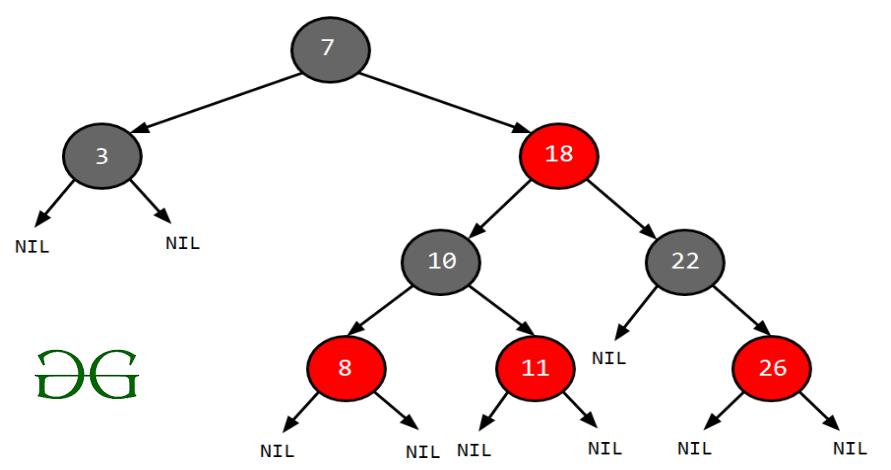

In [ ]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/20200427100650/red-black-tree.png")

# ÁRVORES RUBRO-NEGRAS (VERMELHO E PRETAS)

Árvores Vermelho Preto ou Rubro-Negras(Red Black Trees) é um tipo de árvore de busca binária balanceada que usa um conjunto específico de regras para garantir que a árvore esteja sempre balanceada. Esse equilíbrio garante que a complexidade de tempo para operações como inserção, exclusão e busca seja sempre O(log n), independente do formato inicial da árvore.

As árvores RUBRO-NEGRAS são auto-equilibradas, o que significa que a árvore se ajusta automaticamente após cada operação de inserção ou exclusão. Ele usa um mecanismo simples, mas poderoso, para manter o equilíbrio, colorindo cada nó da árvore de vermelho ou preto.

A árvore Vermelho-Preto é uma árvore de pesquisa binária em que cada nó é colorido com vermelho ou preto. É um tipo de árvore de busca binária com autoequilíbrio. Ele tem uma complexidade de tempo de execução boa e eficiente no pior caso.

## Propriedades da árvore vermelha preta:

A árvore Vermelho-Preta satisfaz todas as propriedades da árvore de pesquisa binária, além de satisfazer as seguintes propriedades adicionais -

  1. Propriedade raiz: A raiz é preta.

  2. Propriedade externa: Cada folha (Folha é filho NULL de um nó) é preta na árvore Vermelho-Preta.

  3. Propriedade interna: Os filhos de um nó vermelho são pretos. Portanto, o possível pai do nó vermelho é um nó preto.

  4. Propriedade de profundidade: Todas as folhas têm a mesma profundidade de preto.

  5. Propriedade do caminho: cada caminho simples da raiz ao nó folha descendente contém o mesmo número de nós pretos.

O resultado de todas essas propriedades mencionadas acima é que a árvore Rubro-Negra é aproximadamente equilibrada.

Regras que toda árvore rubro-negra segue:
  1. Cada nó tem uma cor vermelha ou preta.
  2. A raiz da árvore é sempre preta.
  2. Não há dois nós vermelhos adjacentes (um nó vermelho não pode ter um pai ou filho vermelho).
  3. Cada caminho de um nó (incluindo raiz) para qualquer um de seus nós descendentes NULL tem o mesmo número de nós pretos.
  4. Cada folha (ou nó NULL) deve ser de cor PRETA.



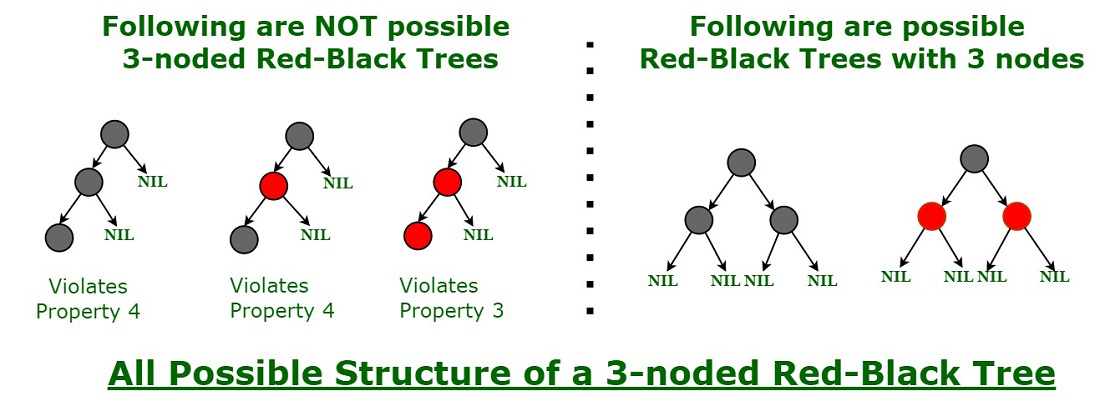

In [ ]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/20220602135051/3NodedRedBlacktree.jpg")

## Rotação direita :

Se um nó for adicionado à subárvore esquerda da subárvore esquerda, a árvore AVL pode ficar desequilibrada, fazemos uma única rotação para a direita.

In [147]:
%matplotlib inline
from PIL import Image # carregar a imagem das árvores

import random # gerar valores aleatórios
from collections import deque #

#from graphviz import Digraph # biblioteca para desenhar árvores

import matplotlib.pyplot as plt # plot gráficos
import numpy as np # biblioteca numerica python
import queue # Estruturas de dados de filas

import matplotlib.pyplot as plt # plot
import networkx as nx # biblioteca para desenhar árvores

In [ ]:
# Classe para criar o nó
class Node:
    def __init__(self, data, color="red"):
        self.data = data # adicionar valor ao nó
        self.color = color # define a cor do nó
        self.parent = None # pai
        self.left = None # filho esquerdo
        self.right = None # filho direito

# Classe da Árvore Rubro-Negra
class RedBlackTree:
    def __init__(self):
        self.NIL = Node(data=None, color="black") # instancia o nó como NIL
        self.root = self.NIL

    # Inserção de um nó
    def insert(self, data):
        new_node = Node(data) # Cria um novo nó
        new_node.left = self.NIL # defino o nó esquerdo com Nil
        new_node.right = self.NIL # defino o nó direito com Nil

        parent = None # define o valor do pai como None
        current = self.root # adiciona o valor da raiz na variável current

        while current != self.NIL:  # Enquanto o nó corrente for diferente de NIL (nó vázio)
            parent = current # O pai recebe o nó atual
            if new_node.data < current.data: # se o valor do novo nó é menor que o valor do nó corrente
                current = current.left # adiciona o valor corrente ao nó esquerdo
            else:
                current = current.right # adiciona o valor corrente ao nó direito

        new_node.parent = parent

        if parent is None: # se o pai é None
            self.root = new_node # A raiz recebe o valor None
        elif new_node.data < parent.data: # se o valor do novo nó é menor que o valor do nó corrente
            parent.left = new_node # adiciona o valor do descendente no nó esquerdo
        else:
            parent.right = new_node #adiciona o valor do descendente no nó direito

        new_node.color = "red" # atribui o valor vermelho ao novo nó
        self.fix_insert(new_node)

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.NIL:
            y.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    # realiza a correção das cores dos nós de acordo com as regras de uma arvoré rubro-negra
    def fix_insert(self, k):
        while k != self.root and k.parent.color == "red":
            if k.parent == k.parent.parent.left:
                u = k.parent.parent.right
                if u.color == "red":
                    k.parent.color = "black"
                    u.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.right_rotate(k.parent.parent)
            else:
                u = k.parent.parent.left
                if u.color == "red":
                    k.parent.color = "black"
                    u.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.left_rotate(k.parent.parent)
        self.root.color = "black"

    # Remoção de um nó
    def transplant(self, u, v):
        if u.parent is None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    def minimum(self, node):
        while node.left != self.NIL:
            node = node.left
        return node

    def fix_delete(self, x):
        while x != self.root and x.color == "black":
            if x == x.parent.left:
                s = x.parent.right
                if s.color == "red":
                    s.color = "black"
                    x.parent.color = "red"
                    self.left_rotate(x.parent)
                    s = x.parent.right
                if s.left.color == "black" and s.right.color == "black":
                    s.color = "red"
                    x = x.parent
                else:
                    if s.right.color == "black":
                        s.left.color = "black"
                        s.color = "red"
                        self.right_rotate(s)
                        s = x.parent.right
                    s.color = x.parent.color
                    x.parent.color = "black"
                    s.right.color = "black"
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                # Simétrico ao caso acima
                s = x.parent.left
                if s.color == "red":
                    s.color = "black"
                    x.parent.color = "red"
                    self.right_rotate(x.parent)
                    s = x.parent.left
                if s.right.color == "black" and s.left.color == "black":
                    s.color = "red"
                    x = x.parent
                else:
                    if s.left.color == "black":
                        s.right.color = "black"
                        s.color = "red"
                        self.left_rotate(s)
                        s = x.parent.left
                    s.color = x.parent.color
                    x.parent.color = "black"
                    s.left.color = "black"
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = "black"

    def delete_node(self, data):
        z = self.root
        while z != self.NIL:
            if z.data == data:
                break
            elif z.data < data:
                z = z.right
            else:
                z = z.left
        if z == self.NIL:
            return  # Nó não encontrado

        y = z
        y_original_color = y.color
        if z.left == self.NIL:
            x = z.right
            self.transplant(z, z.right)
        elif z.right == self.NIL:
            x = z.left
            self.transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == "black":
            self.fix_delete(x)


    # Pesquisar um elemento na arvore
    def search(self, data):
        return self._search_helper(self.root, data)

    def _search_helper(self, node, data):
        if node == self.NIL or node.data == data:
            return node
        if data < node.data:
            return self._search_helper(node.left, data)
        else:
            return self._search_helper(node.right, data)

    #################### Funções para percorrear a árvore ###################
    # --------- Função para realizar a travessia em ordem -------------------
    def inorder_traversal(self, node, result=None):
        """Travessia in-ordem da árvore rubro-negra."""
        if result is None:
            result = []
        if node != self.NIL:
            self.inorder_traversal(node.left, result)
            result.append(node.data)
            self.inorder_traversal(node.right, result)
        return result

    # -------- Função de travessia em pré-ordem -----------------------------
    def preorder_traversal(self, node, result=None):
        """Travessia pré-ordem da árvore rubro-negra."""
        if result is None:
            result = []
        if node != self.NIL:
            result.append(node.data)
            self.preorder_traversal(node.left, result)
            self.preorder_traversal(node.right, result)
        return result

    # ------- Função de travessia em pós-ordem ------------------------------
    def postorder_traversal(self, node, result=None):
        """Travessia pós-ordem da árvore rubro-negra."""
        if result is None:
            result = []
        if node != self.NIL:
            self.postorder_traversal(node.left, result)
            self.postorder_traversal(node.right, result)
            result.append(node.data)
        return result
    # ---------  Level-Order Travessia (ou Breadth-First Search) ------------


    # Altura da árvore

    def height(self, node):
        if node == self.NIL:
            return 0
        else:
            # Compute the height of each subtree
            left_height = self.height(node.left)
            right_height = self.height(node.right)

            # Use the larger one
            if left_height > right_height:
                return left_height + 1
            else:
                return right_height + 1

    # Profundidade e altura de um nó
    def node_depth(self, data):
        """Calcula a profundidade de um nó dado seu valor."""
        current = self.root
        depth = 0
        while current != self.NIL:
            if current.data == data:
                return depth
            elif data < current.data:
                current = current.left
            else:
                current = current.right
            depth += 1
        return -1  # Indica que o nó não foi encontrado

    # Niveis da arvore
    def levels(self):
        if self.root == self.NIL:
            return []

        levels = []
        queue = deque([(self.root, 0)])  # (node, level)

        while queue:
            current, level = queue.popleft()

            if len(levels) == level:
                levels.append([])
            levels[level].append(current.data)

            if current.left != self.NIL:
                queue.append((current.left, level + 1))
            if current.right != self.NIL:
                queue.append((current.right, level + 1))

        return levels

    ################ Funções para gerar a visualização da árvore ###############
    # Gerar visualuzação
    def visualize(self, tree):
      def add_nodes_edges(node, parent=None, graph=None, pos=None, x=0, y=0, layer=1):
          if graph is None:
              graph = nx.DiGraph()
          if pos is None:
              pos = {}
          if node != tree.NIL:
              graph.add_node(node.data, color=node.color)
              pos[node.data] = (x, y)
              if parent:
                  graph.add_edge(parent.data, node.data)
              add_nodes_edges(node.left, node, graph, pos, x - 1 / layer, y - 1, layer + 1)
              add_nodes_edges(node.right, node, graph, pos, x + 1 / layer, y - 1, layer + 1)
          return graph, pos

      graph, pos = add_nodes_edges(tree.root)
      colors = [node[1]['color'] for node in graph.nodes(data=True)]

      # Drawing the graph
      plt.figure(figsize=(8, 5))
      nx.draw(graph, pos, node_color=colors, font_color="white", with_labels=True, node_size=1000,
              edge_color='black', linewidths=1, font_size=10,
              cmap=plt.cm.Reds, arrowstyle='->', arrowsize=10)
      plt.title('Red-Black Tree')
      plt.show()



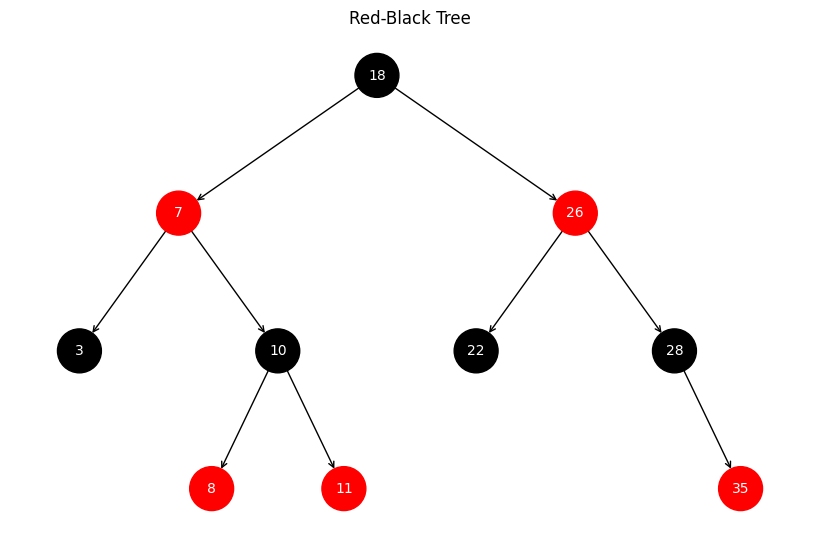

In [ ]:
# Criação da árvore e inserção de elementos
# Criando a instância da árvore rubro-negra
rbt = RedBlackTree()

# Inserindo alguns valores para criar a árvore
values_to_insert = [7, 3, 18, 10, 22, 8, 11, 26,28,35]
for value in values_to_insert:
    rbt.insert(value)

rbt.root.data, rbt.root.color  # Mostrando a raiz da árvore e sua cor

rbt.root.data

# Plotting the red-black tree
rbt.visualize(rbt)


# Deletar um nó da Árvore  Rubro-Negra

A implementação da remoção de um nó em uma árvore rubro-negra é mais complexa do que a inserção, pois é necessário manter as propriedades da árvore rubro-negra após a remoção. Isso pode envolver várias rotações e re-colorações. Aqui está um esboço de como você pode implementar a remoção em nossa classe RedBlackTree:

1. Localizar o nó a ser removido: Primeiro, você precisa encontrar o nó que deseja remover.
2. Remover o nó: Existem três casos básicos a considerar quando se remove um nó de uma árvore binária de pesquisa (que é a base de uma árvore rubro-negra):
 - O nó é uma folha (não tem filhos).
 - O nó tem um filho.
 - O nó tem dois filhos.
3. Manter as propriedades da árvore rubro-negra: Após a remoção, a árvore pode violar as propriedades da árvore rubro-negra, então você precisa fazer ajustes. Isso pode envolver a re-coloração de nós e várias rotações.


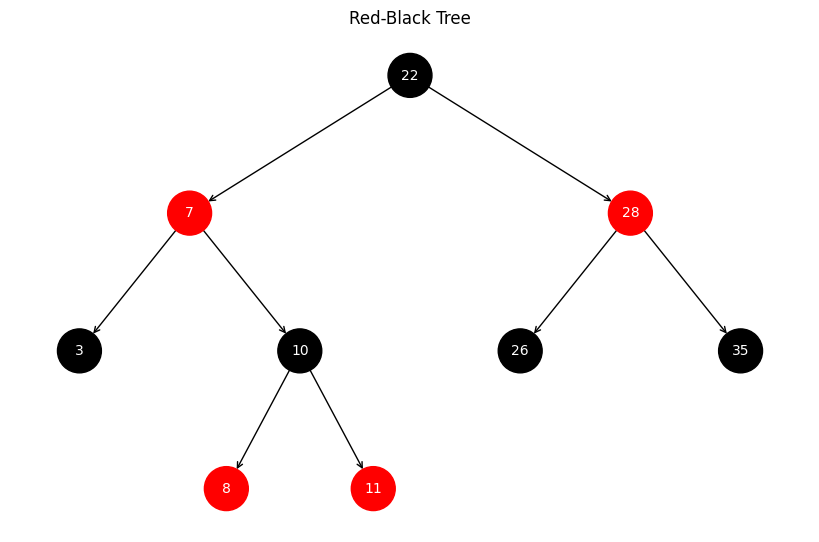

In [ ]:
rbt.delete_node(18)


# Plotting the red-black tree
rbt.visualize(rbt)


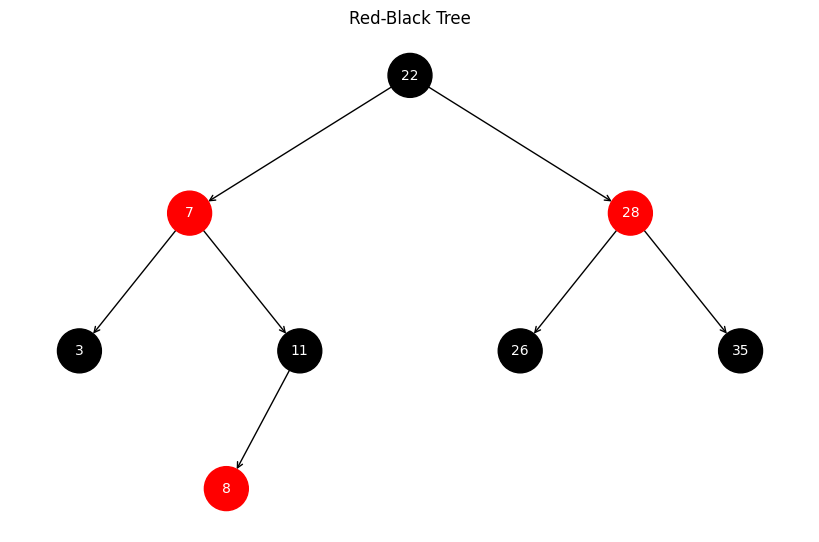

In [ ]:
rbt.delete_node(10)


# Plotting the red-black tree
rbt.visualize(rbt)

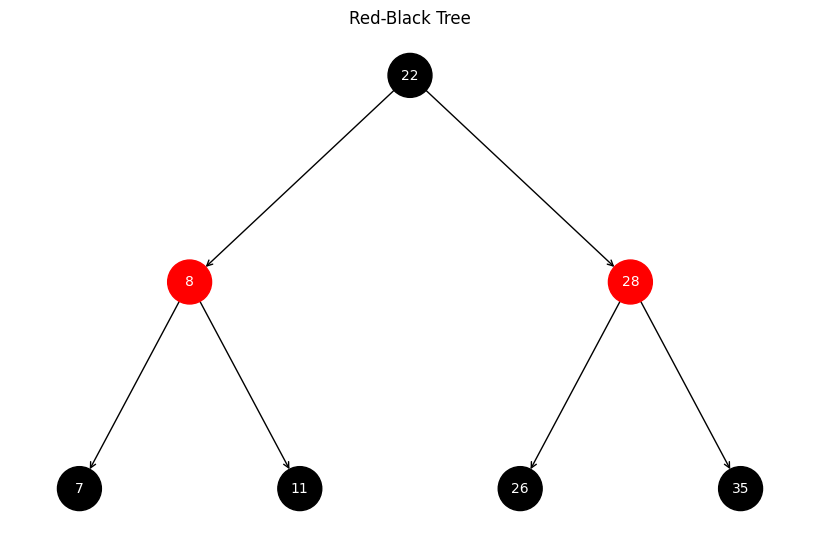

In [ ]:
rbt.delete_node(3)


# Plotting the red-black tree
rbt.visualize(rbt)

## Pesquisar
A busca de um elemento na árvore Rubro-Negra,  passamos o valor a ser buscado. O método retorna o nó que contém o valor, se encontrado, ou None caso contrário.

In [ ]:
searched_node = rbt.search(100)
search_result = searched_node.data

if search_result:
    print("Valor encontrado:", searched_node.data)
else:
    print("Valor não encontrado")

Valor não encontrado


## Travessias em Arvore A Rubro-Negra

1. In-Order Travessia :
Na travessia in-order (em ordem), primeiro visitamos recursivamente o filho esquerdo do nó, depois o próprio nó, e finalmente o filho direito. Esta travessia produz os elementos da árvore em ordem crescente.

2. Pre-Order Travessia:
Na travessia pre-order (pré-ordem), visitamos o nó antes de seus filhos. Primeiro visitamos o nó atual, depois recursivamente o filho esquerdo e, finalmente, o filho direito. Esta travessia é útil para copiar a árvore.

3. Post-Order Travessia:
Na travessia post-order (pós-ordem), visitamos o nó após seus filhos. Primeiro visitamos recursivamente o filho esquerdo, depois o filho direito, e finalmente o nó atual. Esta travessia é frequentemente usada para deletar ou liberar nós e seus recursos da memória de forma segura.


In [ ]:

# Travessia da árvore em ordem
print("Travessia em ordem da árvore binária:")
inorder_result = rbt.inorder_traversal(rbt.root)
inorder_result

Travessia em ordem da árvore binária:


[7, 8, 11, 22, 26, 28, 35]

In [ ]:
# Travessia da árvore em Pré ordem
print("Travessia em pré-ordem da árvore:")
preorder_result = rbt.preorder_traversal(rbt.root)
preorder_result


Travessia em pré-ordem da árvore:


[22, 8, 7, 11, 28, 26, 35]

In [ ]:
# Travessia da árvore em pós-ordem
print("Travessia em pós-ordem da árvore binária:")
postorder_result = rbt.postorder_traversal(rbt.root)

postorder_result


Travessia em pós-ordem da árvore binária:


[7, 11, 8, 26, 35, 28, 22]

# Pesquisar a "Altura ou Profundidade" de uma árvore Rubro-Negra

A altura de uma árvore é medida pelo número de nós ao longo do caminho mais longo desde a raiz até o nó folha mais distante.

In [ ]:

print("Profundidade da árvore:", rbt.height(rbt.root))

Profundidade da árvore: 3


## Calcular a profundidade de um nó da uma Árvore Rubro-Negra


Para calcular a profundidade de um nó específico em uma árvore rubro-negra, você pode seguir o caminho desde a raiz até o nó e contar o número de arestas. A profundidade da raiz é 0, e a profundidade de qualquer outro nó é a profundidade de seu pai mais 1. Aqui está como você pode implementar um método para calcular a profundidade de um nó dado seu valor:

In [ ]:
# Supondo que você já tenha inserido alguns nós na árvore AVL...
key = 10  # A chave do nó cuja profundidade você quer encontrar
node_depth = rbt.node_depth(key)

if node_depth >= 0:
    print(f"A profundidade do nó com a chave {key} é {node_depth}.")
else:
    print(f"O nó com a chave {key} não foi encontrado na árvore.")

O nó com a chave 10 não foi encontrado na árvore.


# Quantidade de Níveis em uma Arvore Rubro Negra

Para pesquisar os níveis da árvore, podemos implementar um método que percorre a árvore por nível, também conhecido como travessia em largura ou BFS (Breadth-First Search). Esse método usa uma fila para manter os nós a serem visitados e vai processando cada nó nível por nível. Vamos implementar este método na classe RedBlackTree para obter os valores dos nós em cada nível da árvore rubro-negra:

In [ ]:


level = rbt.levels()
print(level)

for i in range(len(level)):
  print("Nível {}: {}".format(i, level[i]))

[[22], [8, 28], [7, 11, 26, 35]]
Nível 0: [22]
Nível 1: [8, 28]
Nível 2: [7, 11, 26, 35]


# Criando Exemplos de Árvores Rubro-Negras com valores Aleatórios

In [ ]:



# Criação da árvore e inserção de elementos
# Criando a instância da árvore rubro-negra
rbt = RedBlackTree()

# Inserindo alguns valores para criar a árvore
values_to_insert = set([random.randint(1,100) for i in range(10)])
for value in values_to_insert:
    rbt.insert(value)

rbt.root.data, rbt.root.color  # Mostrando a raiz da árvore e sua cor

rbt.root.data

# Plotting the red-black tree
rbt.visualize(rbt)



In [ ]:
Nil